In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

from sklearn.decomposition import PCA

%matplotlib inline

data = 'data/random_forest_data.csv'

In [299]:
df = pd.read_csv(data, low_memory=False)

In [300]:
df.shape

(132819, 31)

In [301]:
df.isnull().sum()

Unnamed: 0                  0
x                           0
y                           0
majorinjuries_bicyclist     0
minorinjuries_bicyclist     0
fatal_bicyclist             0
majorinjuries_driver        0
minorinjuries_driver        0
fatal_driver                0
majorinjuries_pedestrian    0
minorinjuries_pedestrian    0
fatal_pedestrian            0
total_vehicles              0
total_bicycles              0
total_pedestrians           0
pedestriansimpaired         0
bicyclistsimpaired          0
driversimpaired             0
total_taxis                 0
total_government            0
speeding_involved           0
offintersection             0
intapproachdirection        0
ward_number                 0
date_r                      0
injuries_any                0
day_of_week                 0
fatal                       0
ped_inj_or_fatal            0
driver_inj_or_fatal         0
bike_inj_or_fatal           0
dtype: int64

In [302]:
# Make dummies of intapproachdirection, ward, dayofweek
dir_dummies = pd.get_dummies(df['intapproachdirection'], drop_first=True)
dir_dummies.head()

,North,Northeast,Northwest,South,Southeast,Southwest,West
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [303]:
df = pd.concat([df, dir_dummies], axis=1)
df.head()

,Unnamed: 0,x,y,majorinjuries_bicyclist,minorinjuries_bicyclist,fatal_bicyclist,majorinjuries_driver,minorinjuries_driver,fatal_driver,majorinjuries_pedestrian,...,ped_inj_or_fatal,driver_inj_or_fatal,bike_inj_or_fatal,North,Northeast,Northwest,South,Southeast,Southwest,West
0,570,-77.012158,38.915732,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0,1,0,0,0,0,0
1,571,-77.012176,38.892094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
2,572,-77.011616,38.955593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,573,-77.011616,38.956400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
4,574,-77.012151,38.919183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0


In [304]:
# Convert date_r to date
df.date_r = df.date_r.astype('datetime64[ns]')


In [305]:
X = df.drop(columns=['fatal', 'date_r', 'intapproachdirection']) # can't do pca with dates


In [306]:
# standardize!!
from sklearn.preprocessing import StandardScaler
# Create a scaler object
s = StandardScaler()

# Fit the scaler to the features and transform
X_std = s.fit_transform(X)


In [307]:
pca = PCA(n_components=5)
pca.fit(X)
print(pca.explained_variance_ratio_)                             # eigenvalues - can I plot this?
print(pca.singular_values_)

[9.99999251e-01 7.42556481e-07 2.54645145e-09 2.31767637e-09
 3.78713462e-10]
[1.45771026e+07 1.25613443e+04 7.35595515e+02 7.01774800e+02
 2.83678711e+02]


In [308]:
pca.explained_variance_

array([1.59987291e+09, 1.18799689e+03, 4.07400173e+00, 3.70799040e+00,
       6.05893861e-01])

In [309]:
print(pca.components_[0])

[ 9.99999995e-01  3.28033920e-07 -2.33035729e-07 -1.04290686e-08
 -6.27892378e-08  1.21770437e-10  2.90901221e-07  2.19958549e-07
  4.45939310e-09 -1.59285553e-08 -1.15865762e-07 -7.93463860e-10
  3.76207186e-08 -1.10006063e-07 -9.66465240e-08 -5.20483515e-09
 -1.22185007e-09 -2.44110416e-09 -8.28433024e-07  1.69920651e-07
  2.58679465e-07  1.01206968e-04  2.50039244e-05  2.68977646e-07
 -5.71185482e-07 -1.32587781e-07  5.15319163e-07 -7.30965360e-08
 -1.77617717e-06  4.57882394e-07  2.43266970e-07 -3.91656838e-07
  3.93552050e-07  4.12062170e-07  9.29160563e-09]


### K-Means Clustering

I've been educated that PCA will not improve my models, but that possibly clustering can.  I'll explore that now.

In [310]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [311]:
km.labels_
len(km.labels_)

132819

In [312]:
%%time
km2 = KMeans(n_clusters=3, random_state=42, n_jobs=-2)
km2.fit(X)

CPU times: user 1.5 s, sys: 405 ms, total: 1.9 s
Wall time: 2.5 s


In [313]:
km2.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

### Random Forest with KMeans cluster labels

# TODO:

1. repeat exactly as in the earlier modeling I did, plus only the cluster labels
1. then add in my dummy variables
1. finally, iterate over multiple k's in my clusters, repeat the whole thing several iterations (or figure out how to 'score' my cluster)

In [314]:
df['cluster'] = km2.labels_

feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df[feature_cols]
y = df['injuries_any']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [315]:
%%time
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

CPU times: user 34.5 s, sys: 830 ms, total: 35.4 s
Wall time: 5.97 s


In [316]:
pd.crosstab(y_test, predictions, rownames=['Actual Status'], colnames=['Predicted Status'])

Predicted Status,0,1
Actual Status,,
0,17981,1905
1,5122,1556


In [317]:
rfc.score(X_test, y_test)

0.7354690558650806

In [318]:
list(zip(X_train, rfc.feature_importances_))

[('speeding_involved', 0.02761553750042978),
 ('total_pedestrians', 0.03248050282697148),
 ('total_bicycles', 0.01587070647431638),
 ('total_vehicles', 0.03136456172837041),
 ('ward_number', 0.012895575167218912),
 ('x', 0.269234528156387),
 ('y', 0.2773099523957892),
 ('bicyclistsimpaired', 6.018870954920501e-05),
 ('driversimpaired', 0.002793562062476458),
 ('pedestriansimpaired', 0.000320183914009353),
 ('offintersection', 0.31875929516119444),
 ('cluster', 0.011295405903287419)]

In [23]:
'''%%time
# What's the best number of regressors?
rsq_list = []

for k in range(2, 100):
    rfc = RandomForestClassifier(n_estimators=k, n_jobs=-2)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    rsq_list.append(score)'''

CPU times: user 27min 1s, sys: 32.8 s, total: 27min 34s
Wall time: 4min 30s


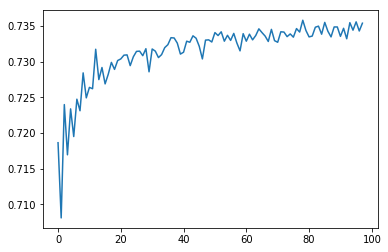

In [24]:
'''plt.plot(rsq_list)'''

### Major Injuries or Fatalities with Clusters

Still only working with some of the data (plus cluster label), no dummies

In [319]:
df['major_fatal'] = 0
df.loc[((df.majorinjuries_bicyclist>0) | (df.fatal_bicyclist>0) | 
        (df.majorinjuries_driver>0) | (df.fatal_driver>0) | 
        (df.majorinjuries_pedestrian>0) | (df.fatal_pedestrian>0)), 'major_fatal'] = 1

df.major_fatal.sum()

12312

In [320]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df[feature_cols]
y = df['major_fatal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [321]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,0,1
major_fatal,,
0,23675,468
1,2339,82


### Major Injuries or Fatalities with Upsampling and Clusters

Important note - upsampling was not done properly originally, and it will be corrected henceforth.  Only upsample on the training data, not on the test data.  

1. train test split the data first
1. join X_train, y_train data
1. apply upsampling to the above (only--not to test data)
1. re-separate X_train, y_train data
1. continue with model fitting

#### Perform split and upsampling
Prior to upsampling, 10% of my data is either major injury or fatality.  I'll upsample this minority data to be the same size as the majority data.

In [338]:
# upsampling the minority (like my original modeling)
#ratio_major_or_fatal = df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
#print(ratio_major_or_fatal)
#majors = df.loc[df.major_fatal == 1]
#low_injuries = df.loc[df.major_fatal == 0]

upsampled_majors = df.copy(deep=True)
X = upsampled_majors[feature_cols]
y = upsampled_majors.major_fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# NOW upsample X_train & y_train

# combine x and y to one DF
training_data = pd.concat([X_train, y_train], axis=1)

majors = training_data.loc[training_data.major_fatal > 0]
#print('majors: {}'.format(str(majors.shape)))
minors = training_data.loc[training_data.major_fatal == 0]
#print('minors: {}'.format(str(minors.shape)))

majors_upsampled = resample(majors, replace=True, n_samples=108440, random_state=42)
print('majors_upsampled: {}'.format(str(majors_upsampled.shape)))

training_df_upsampled = pd.concat([majors_upsampled, minors])
#training_df_upsampled.shape
#print('final training data: {}'.format(str(training_df_upsampled.shape)))

X_train = training_df_upsampled[feature_cols]
y_train = training_df_upsampled.major_fatal

majors: (11122, 13)
minors: (108415, 13)
majors_upsampled: (108440, 13)


In [354]:
def upsample_ttsplit(df, feature_cols, target, minority_case):
    '''
    Return new splits, with minority upsampled in training data.
    Requires that minority case is a field that is 0, majority is non-zero.
    
    args: dataframe, feature_cols, y-field (target), minority field to upsample
    '''
    foo = df.copy(deep=True)
    X=foo[feature_cols]
    y=foo[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    training_data = pd.concat([X_train, y_train], axis=1)
    
    # upsample and concat
    minorities = training_data.loc[training_data[minority_case] > 0]
    majorities = training_data.loc[training_data[minority_case] == 0]
    
    minorities_upsampled = resample(minorities, replace=True, n_samples=majorities.shape[0], random_state=42)
    
    training_data = pd.concat([minorities_upsampled, majorities])

    X_train = training_data[feature_cols]
    y_train = training_data[target]
    
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = upsample_ttsplit(df, feature_cols, 'major_fatal', 'major_fatal')
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### Random Forest with Proper Upsampling 

In [332]:
# The Model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

'''Old:

col_0	0	1
major_fatal		
0	9789	2290
1	570	11453'''
pd.crosstab(y_test, predictions)


'Old:\n\ncol_0\t0\t1\nmajor_fatal\t\t\n0\t9789\t2290\n1\t570\t11453'

In [334]:
pd.crosstab(y_test, predictions)  # 81% majority recall, 25% minority

col_0,0,1
major_fatal,,
0,9849,2235
1,903,295


In [335]:
rfc.score(X_test, y_test)  # old: 0.8813376483279396

0.763740400542087

### Fatalities with Upsampling, Clusters

Note upsampling is on rows having eithr major injuries or fatalities, not on fatalities alone, because they are relatively few.  I will be predicting fatalities, so this may need to be reconsidered.

In [358]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster','major_fatal']

X = df_upsampled[feature_cols]
y = df_upsampled.fatal

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# FIXES Upsampling:
X_train, X_test, y_train, y_test = upsample_ttsplit(df, feature_cols, 'fatal', 'major_fatal')


rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(rfc.score(X_test, y_test))

#for i in range(2,10):
    #rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
    #rfc.fit(X_train, y_train)
    #predictions = rfc.predict(X_test)

'''
former confusion (with improper upsampling):
col_0	False	True
fatal		
False	23931	17
True	36	118
'''
pd.crosstab(y_test, predictions)

0.9987953621442553


col_0,False,True
fatal,,
False,13266,5
True,11,0


### Ohhhh

But wow, I just got better results!  This was surprising to me.  I'm not even sure what this means.  

In [357]:
#rfc.score(X_test, y_test)

0.9984189128143351

582/11385=0.05112

38/112=0.339

### What happens if I only upsample on the fatalities

Fatalities represent 0.01 % of the rows.  Upsample by 100x to maybe make them 10% of the rows.  Risk: this also will _add major injuries_ to my majority rows, which may add noise to my fatality signal.

```df.loc[df.fatal].shape[0] / df.shape[0] = 0.001242292141937524```

In [359]:
'''df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_upsampled = resample(fatals, replace=True, n_samples=12051, random_state=42)
df_fatals_upsampled = pd.concat([df_fatals_upsampled, nonfatals])'''

X_train, X_test, y_train, y_test = upsample_ttsplit(df, feature_cols, 'fatal', 'fatal')


#### Try also with n_samples=1200, and with replace=False -- can that work?

In [ ]:
'''df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_upsampled = resample(fatals, replace=True, n_samples=12051, random_state=42)
df_fatals_upsampled = pd.concat([df_fatals_upsampled, nonfatals])'''

In [361]:
#df.columns

Index(['Unnamed: 0', 'x', 'y', 'majorinjuries_bicyclist',
       'minorinjuries_bicyclist', 'fatal_bicyclist', 'majorinjuries_driver',
       'minorinjuries_driver', 'fatal_driver', 'majorinjuries_pedestrian',
       'minorinjuries_pedestrian', 'fatal_pedestrian', 'total_vehicles',
       'total_bicycles', 'total_pedestrians', 'pedestriansimpaired',
       'bicyclistsimpaired', 'driversimpaired', 'total_taxis',
       'total_government', 'speeding_involved', 'offintersection',
       'intapproachdirection', 'ward_number', 'date_r', 'injuries_any',
       'day_of_week', 'fatal', 'ped_inj_or_fatal', 'driver_inj_or_fatal',
       'bike_inj_or_fatal', 'North', 'Northeast', 'Northwest', 'South',
       'Southeast', 'Southwest', 'West', 'cluster', 'major_fatal'],
      dtype='object')

In [360]:
df_fatals_upsampled.shape

(144705, 40)

In [362]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

#X = df_fatals_upsampled[feature_cols]
#y = df_fatals_upsampled.fatal

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_test, y_train, y_test = upsample_ttsplit(df, feature_cols, 'fatal', 'fatal')


rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,13154,109
True,18,1


In [364]:
rfc.score(X_test, y_test)

0.9904381870200271

In [369]:
list(zip(X_train, rfc.feature_importances_))

[('speeding_involved', 0.060469745079064004),
 ('total_pedestrians', 0.009576106135733294),
 ('total_bicycles', 0.01401191443173165),
 ('total_vehicles', 0.07561137912590575),
 ('ward_number', 0.05316337538478092),
 ('x', 0.25703723876327295),
 ('y', 0.2526327103832462),
 ('bicyclistsimpaired', 2.0654868226418216e-05),
 ('driversimpaired', 0.002672392954012658),
 ('pedestriansimpaired', 0.00013732700385662644),
 ('offintersection', 0.24297936417216157),
 ('cluster', 0.03168779169800796)]

In [85]:
from sklearn.metrics import confusion_matrix

df_fatals_upsampled['fatal_predictions'] = rfc.predict(X)
cm = confusion_matrix(df_fatals_upsampled.fatal, df_fatals_upsampled.fatal_predictions,
                 labels=None, sample_weight=None)
cm

array([[131945,    709],
       [   123,  11928]])

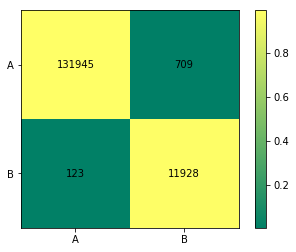

In [89]:
# credits for plot:  https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python

conf_arr = cm
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)
    
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.summer, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('fatality_confusion_matrix.png', format='png')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'fatal_predictions'

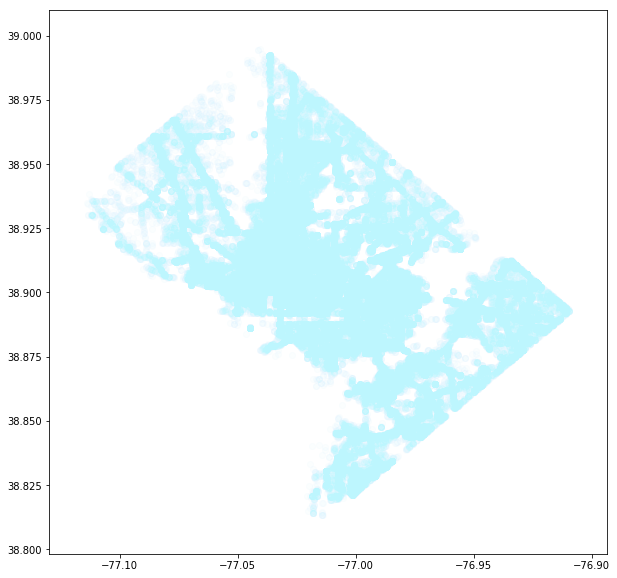

In [113]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
plt.scatter(df_fatals_upsampled.x, df_fatals_upsampled.y, c='#bdf6fe', alpha=0.05)
true_fatals = df_fatals_upsampled.loc[df_fatals_upsampled.fatal]
pred_fatals = df_fatals_upsampled.loc[df_fatals_upsampled.fatal_predictions]
plt.scatter(pred_fatals.x, pred_fatals.y, marker = 'o', c='#c27e79', alpha = 0.05)
#plt.scatter(true_fatals.x, true_fatals.y, c='#ff0789', marker='+', markersize=3, alpha=0.05)
plt.scatter(true_fatals.x, true_fatals.y, marker = '+', linewidth=2, c='#fdff63')

plt.show()

### Feature Importances

In [130]:
df_fatals_upsampled.columns
rfc.feature_importances_

array([6.36229931e-02, 1.16380054e-02, 1.39836685e-02, 5.37859920e-02,
       3.78083744e-02, 2.55405193e-01, 2.55874840e-01, 2.00245948e-05,
       2.97663410e-03, 1.54917777e-03, 2.77580621e-01, 2.57544760e-02])

In [131]:
rfc.decision_path(X)

(<144705x120752 sparse matrix of type '<class 'numpy.int64'>'
 	with 244263127 stored elements in Compressed Sparse Row format>,
 array([     0,   1217,   2396,   3573,   4812,   6041,   7160,   8383,
          9620,  10837,  12076,  13251,  14442,  15633,  16852,  18101,
         19252,  20441,  21634,  22867,  24074,  25331,  26524,  27685,
         28934,  30191,  31478,  32647,  33858,  35065,  36334,  37521,
         38724,  39905,  41104,  42337,  43572,  44753,  45890,  47071,
         48246,  49457,  50668,  51791,  52938,  54099,  55330,  56571,
         57836,  59069,  60268,  61459,  62682,  63899,  65180,  66387,
         67638,  68793,  69948,  71195,  72330,  73501,  74740,  75939,
         77130,  78337,  79570,  80771,  81978,  83189,  84380,  85595,
         86844,  88025,  89292,  90485,  91698,  92939,  94164,  95321,
         96518,  97741,  98914, 100077, 101246, 102435, 103684, 104893,
        106178, 107365, 108566, 109797, 111024, 112189, 113412, 114667,
       

### OK -- second look

Given the insane improvement, I suspect there may be something wrong with my model.  Because of the massive amount of upsampling, maybe I should try downsampling, or maybe I should only train on half of my data and test on the other half.  

1. First, train/test evenly
1. Then, try downsampling my majority data rather than creating so much of the fatal minority.

In [135]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_upsampled[feature_cols]
y = df_fatals_upsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,65918,337
True,106,5992


### Downsampling majority

In [163]:
#df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
#majors = df.loc[df.major_fatal == 1]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_downsampled = resample(nonfatals, replace=True, n_samples=165, random_state=42)
df_fatals_downsampled = pd.concat([df_fatals_downsampled, fatals])

In [164]:
df_fatals_downsampled.shape

(330, 40)

In [168]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_downsampled[feature_cols]
y = df_fatals_downsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,24,18
True,12,12


In [160]:
df.loc[df.fatal].shape

(165, 40)

Looking at these results, let's also look at the data itself.  
- accidents by proximity to intersection?


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


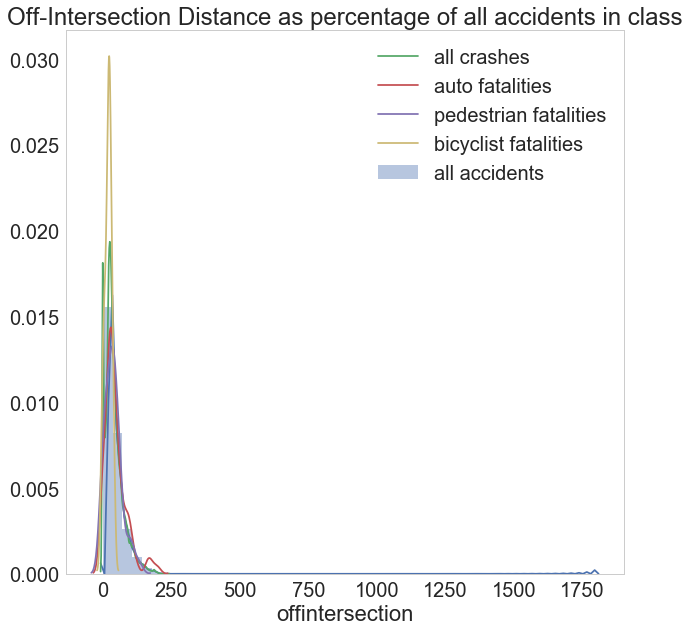

In [372]:
fatals = df.loc[df.fatal]
car_fatals = df.loc[df.fatal_driver >= 1]
bike_fatals = df.loc[df.fatal_bicyclist >= 1]
ped_fatals = df.loc[df.fatal_pedestrian >= 1]

plt.rcParams['figure.figsize'] = [10.0, 10.0]
plt.title('Off-Intersection Distance as percentage of all accidents in class')

sns.distplot(df.offintersection, label='all accidents');

sns.kdeplot(df.offintersection, label='all crashes', clip=(0,300))
sns.kdeplot(car_fatals.offintersection, label="auto fatalities", clip=(0,300))
sns.kdeplot(ped_fatals.offintersection, label="pedestrian fatalities", clip=(0,300))
sns.kdeplot(bike_fatals.offintersection, label="bicyclist fatalities", clip=(0,300))

plt.legend();


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


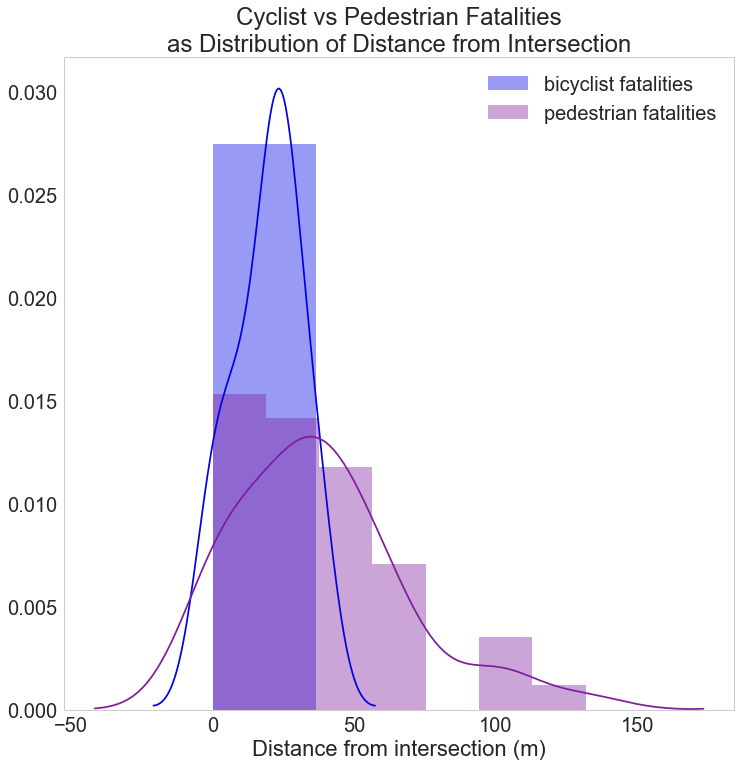

In [448]:
ped_label = str(ped_fatals.offintersection.mean()) #38
bike_label = str(bike_fatals.offintersection.mean()) #19

plt.title('Cyclist vs Pedestrian Fatalities\nas Distribution of Distance from Intersection')

#sns.kdeplot(car_fatals.offintersection, label="auto fatalities", clip=(0,300), )
#sns.kdeplot(ped_fatals.offintersection, label="pedestrian fatalities\n(mean {})".format(ped_label), clip=(0,300))
#sns.kdeplot(bike_fatals.offintersection, label="bicyclist fatalities\n(mean {})".format(bike_label), clip=(0,300))

sns.distplot(bike_fatals.offintersection, label="bicyclist fatalities", color='#0203e2')
sns.distplot(ped_fatals.offintersection, label="pedestrian fatalities", color='#7e1e9c')

#sns.distplot(car_fatals.offintersection, label='car fatalities')

plt.legend();
plt.xlabel('Distance from intersection (m)')
#plt.set_yticks([])
#sns.despine(left=False)
#plt.ylabel('Proportion of fatalities')

plt.savefig('off_intersection_fatalities_distn_bike_v_ped.jpg')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


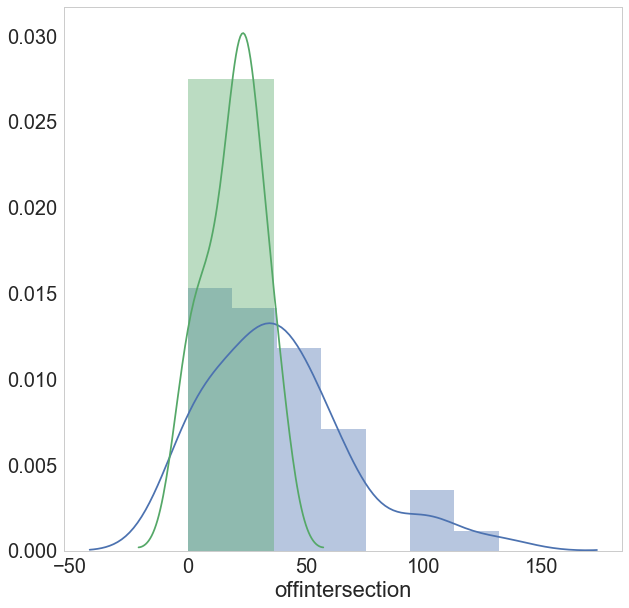

In [391]:
#sns.kdeplot(ped_fatals.offintersection, label="pedestrian fatalities\n(mean 38)", clip=(0,300))
#sns.kdeplot(bike_fatals.offintersection, label="bicyclist fatalities\n(mean 19)", clip=(0,300))
sns.distplot(ped_fatals.offintersection, label='ped fat')
sns.distplot(bike_fatals.offintersection, label='bike fatalities')

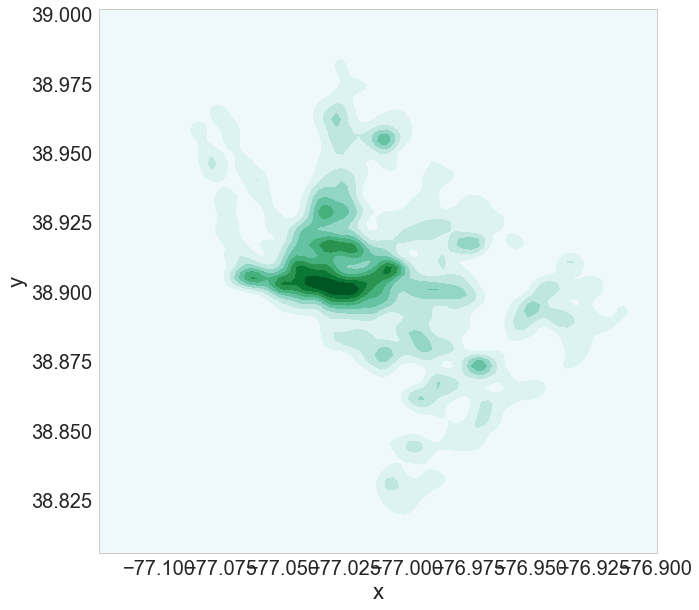

In [373]:
ax = sns.kdeplot(df.x, df.y, shade=True)

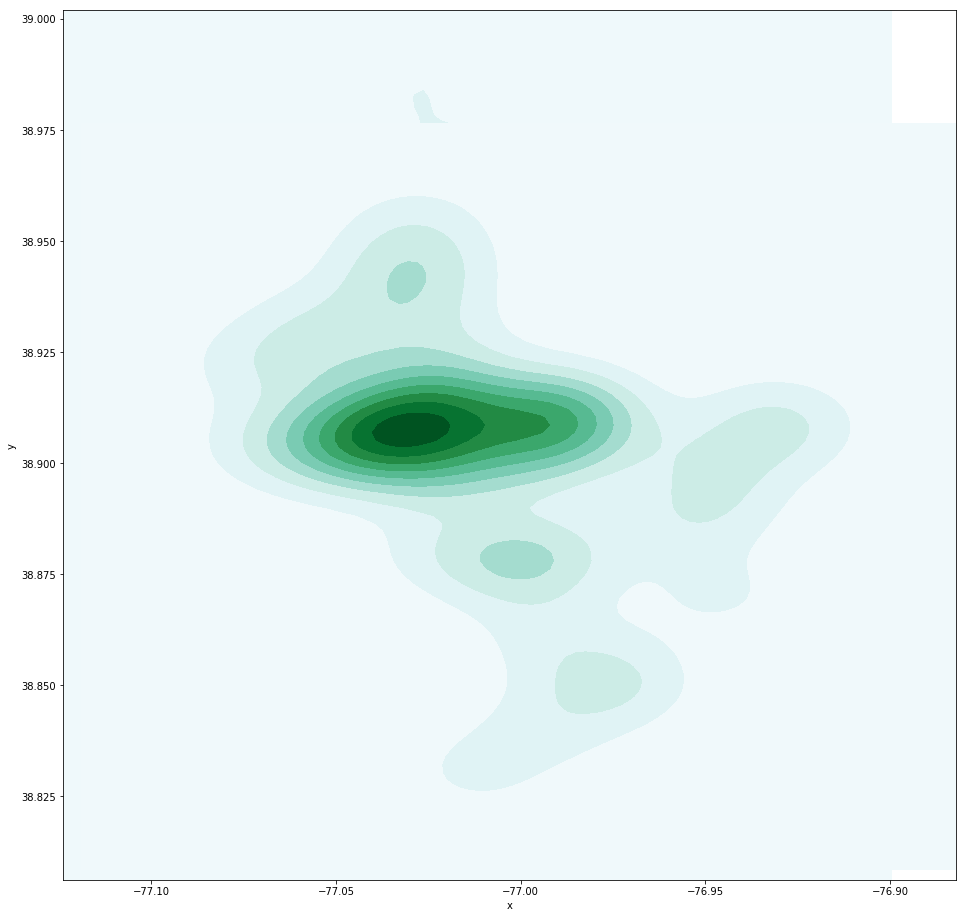

In [72]:
ax = sns.kdeplot(df.x, df.y, shade=True)
ax = sns.kdeplot(ped_fatals.x, ped_fatals.y, shade=True)

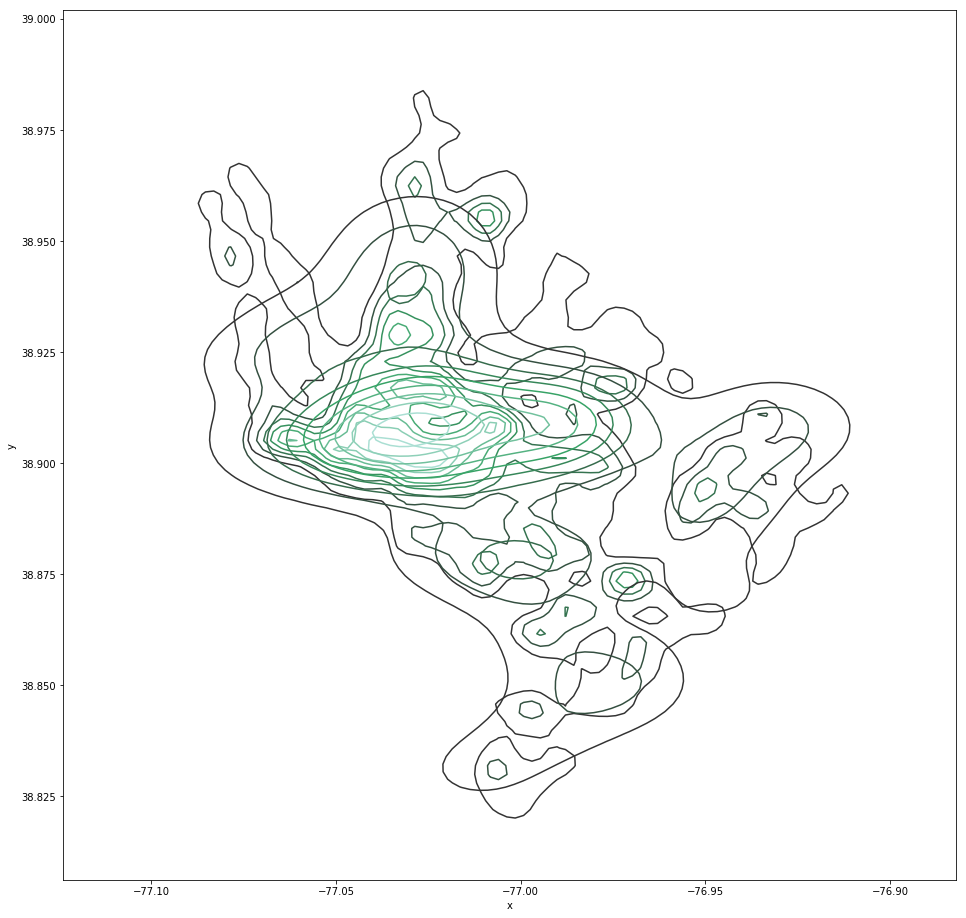

In [73]:
fig, ax = plt.subplots()
sns.kdeplot(df.x, df.y, ax=ax)
sns.kdeplot(ped_fatals.x, ped_fatals.y, ax=ax)
#sns.swarmplot(bike_fatals.x, bike_fatals.y, ax=ax)

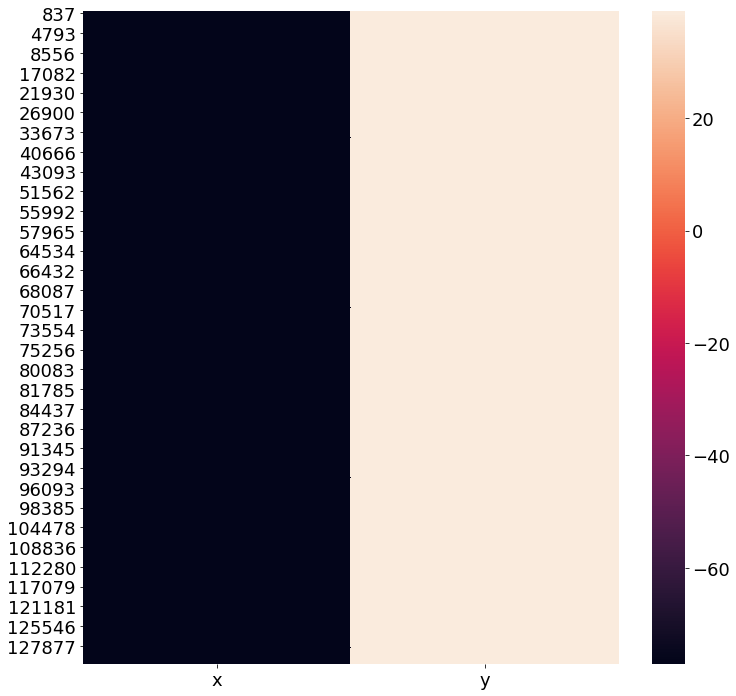

In [206]:
fatal_loc = fatals[['x','y']]
sns.heatmap(fatal_loc)

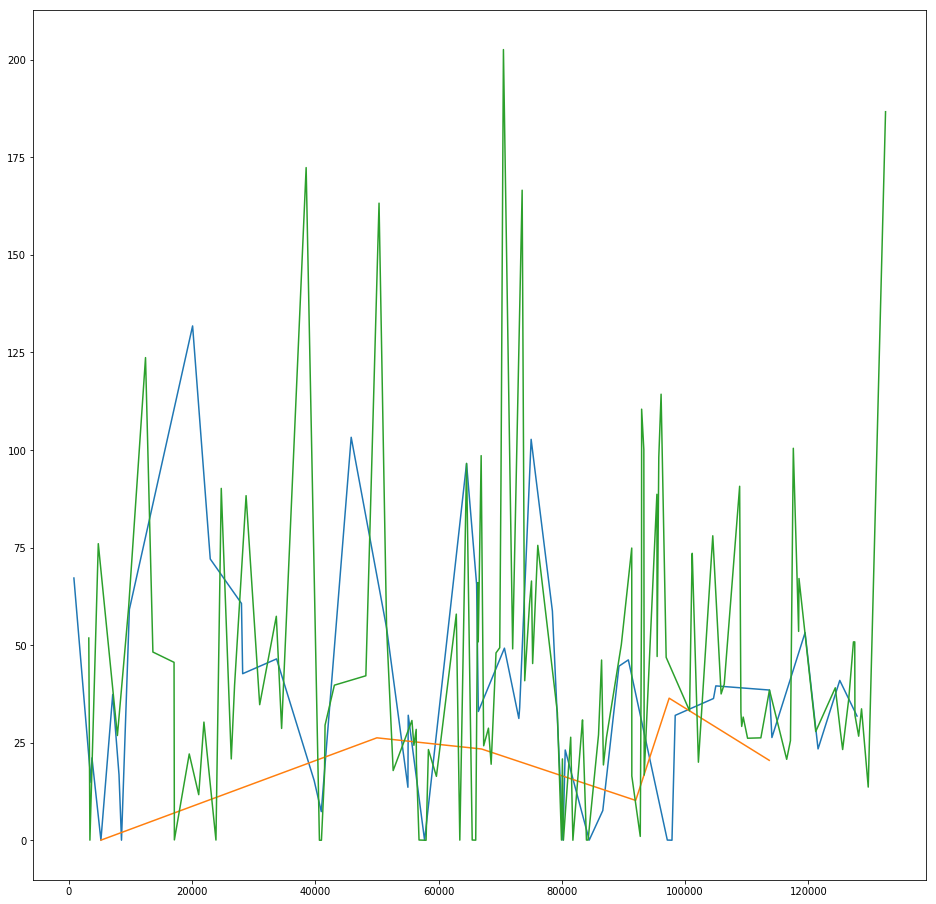

In [89]:
fatals = df.loc[df.fatal]
#plt.plot(fatals.offintersection)
plt.plot(ped_fatals.offintersection)
plt.plot(bike_fatals.offintersection)
plt.plot(car_fatals.offintersection)




#sns.pairplot(df[['fatal', 'offintersection']])

In [472]:
df.columns
print('Total crash data points: {}'.format(str(df.shape[0])))
df[['fatal', 'major_fatal', 'injuries_any']].sum()
df.columns

print('no injuries: ')
print(df.loc[df.minorinjuries_bicyclist + df.minorinjuries_driver + df.minorinjuries_pedestrian == 0].shape[0])

print('minor injuries')
mnr = df.loc[(df.minorinjuries_bicyclist + df.minorinjuries_driver + df.minorinjuries_pedestrian > 0) & 
            (df.major_fatal == 0)]
#mnr.drop(labels=df.loc[(df.major_fatal >0)].index, axis=0, inplace=True)
print(mnr.shape[0])
#df.loc[(df.major_fatal >0)].index
print('major injuries')
mjr = df.loc[(df.majorinjuries_bicyclist>0) |
            (df.majorinjuries_driver>0) |
            (df.majorinjuries_pedestrian>0)]
print(mjr.shape[0])

Total crash data points: 132819
no injuries: 
110866
minor injuries
20915
major injuries
12157


In [109]:
# TODO

# break out year and month into new fields (duh)
# plot accidents by year and plot again by months
# maybe make some dummies out of the months or seasons
# drunk driving counts by year
# 
df.date_r.head()
#df.date_r.values.str.split('-')
#df['date_r'].map(lambda x: 1000*x.year + x.month)
df['year'] = df['date_r'].map(lambda x: x.year)
df['month'] = df['date_r'].map(lambda x: x.month)

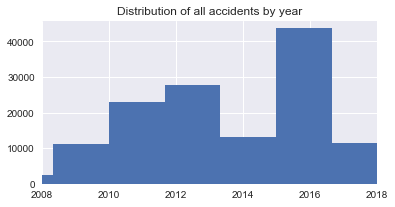

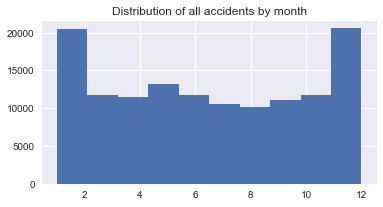

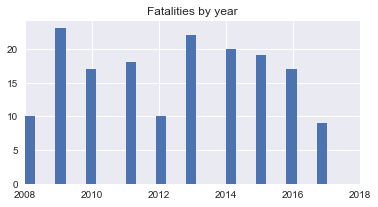

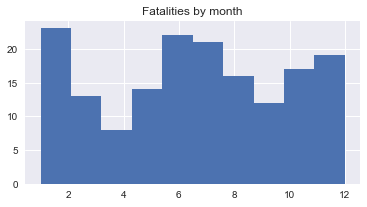

In [207]:
plt.rcParams['figure.figsize'] = [6, 3]
sns.set()

#plt.xlim((2008,2018))
#print(plt.rcParams.keys)
plt.hist(df.year, bins=30)
plt.title('Distribution of all accidents by year')
plt.xlim((2008,2018))
plt.show()

plt.hist(df.month)
plt.title('Distribution of all accidents by month')
#plt.xlim((2008,2018))
plt.show()

fatals = df.loc[df.fatal >=1]
plt.hist(fatals.year, bins=30);
plt.title('Fatalities by year')
plt.xlim((2008,2018))
plt.show()

plt.hist(fatals.month)
plt.title('Fatalities by month')
#plt.xlim((2008,2018))
plt.show()


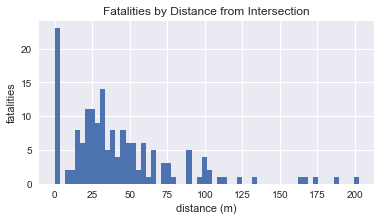

count    165.000000
mean      42.694157
std       37.587277
min        0.007204
25%       20.487304
50%       32.809292
75%       54.400527
max      202.572775
Name: offintersection, dtype: float64

In [208]:
# fatalities by distance from intersection
fatals.shape

plt.hist(fatals.offintersection, bins=60);
plt.title('Fatalities by Distance from Intersection')
plt.xlabel('distance (m)')
plt.ylabel('fatalities')
#plt.xlim((2008,2018))
plt.show()

fatals.offintersection.describe()

### Solid Crash Distribution with fatalities overlaid

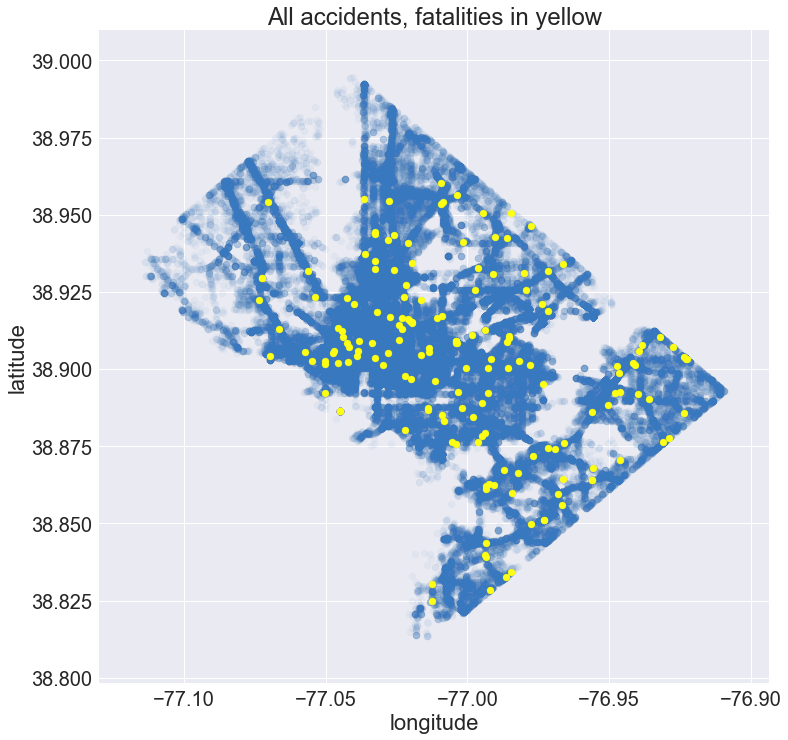

(11122, 13)


2.0    30788
6.0    20245
5.0    19497
7.0    15385
1.0    12814
8.0    12606
4.0    12222
3.0     9262
Name: ward_number, dtype: int64

In [473]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)
#sns.set_style("whitegrid", {'axes.grid' : False})

font = {'size'   : 18}
plt.rc('font', **font)
sns.color_palette(palette='Blues')

cmap.colorbar_extend
cmap.colors

#with sns.color_palette('#2242c7', 1):
#    plt.scatter(df.x, df.y, alpha=0.05)

plt.scatter(df.x, df.y, alpha=0.05, c='#3778bf')
#plt.scatter(majors.x, majors.y, marker='o', c='#f0833a', alpha=.5) # orange majors
plt.scatter(fatals.x, fatals.y, marker='o', c='#ffff14') # yellow fatals

plt.title('All accidents, fatalities in yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.savefig('All_accidents_with_fatals_in_yellow_gray_bkg.png')
plt.show();

print(majors.shape)
df.ward_number.value_counts()

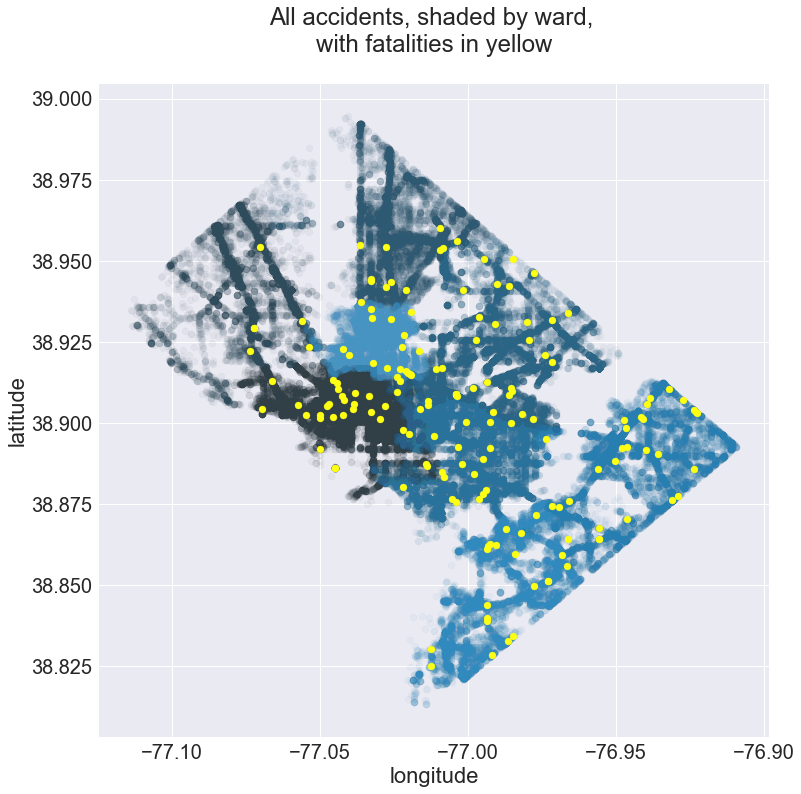

(11122, 13)


2.0    30788
6.0    20245
5.0    19497
7.0    15385
1.0    12814
8.0    12606
4.0    12222
3.0     9262
Name: ward_number, dtype: int64

In [437]:
ward1 = df.loc[df.ward_number == 1]
ward2 = df.loc[df.ward_number == 2]
ward3 = df.loc[df.ward_number == 3]
ward4 = df.loc[df.ward_number == 4]
ward5 = df.loc[df.ward_number == 5]
ward6 = df.loc[df.ward_number == 6]
ward7 = df.loc[df.ward_number == 7]
ward8 = df.loc[df.ward_number == 8]
ward9 = df.loc[df.ward_number == 9]

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)
#sns.set_style("whitegrid", {'axes.grid' : False})

font = {'size'   : 18}
plt.rc('font', **font)

sns.color_palette(palette='Blues')

cmap.colorbar_extend
cmap.colors

#with sns.color_palette("Blues_d", 9):
with sns.color_palette('PuBu_d', 12):

    #plt.scatter(ward1.x, ward1.y, c=cmap., alpha=.05)
    plt.scatter(ward2.x, ward2.y, alpha=.05)  # olive green
    plt.scatter(ward3.x, ward3.y, alpha=.05)  # cornflower blue
    plt.scatter(ward4.x, ward4.y, alpha=.05)
    plt.scatter(ward5.x, ward5.y, alpha=.05)
    plt.scatter(ward6.x, ward6.y, alpha=.05) # lt purple
    plt.scatter(ward7.x, ward7.y, alpha=.05)
    plt.scatter(ward8.x, ward8.y, alpha=.05)
    plt.scatter(ward1.x, ward1.y, alpha=.05)

plt.scatter(fatals.x, fatals.y, marker='o', c='#ffff14')

plt.title('All accidents, shaded by ward, \nwith fatalities in yellow\n')
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.rcParams["axes.labelsize"] = 18


plt.savefig('All_accidents_colored_by_ward_blues_with_fatals_in_yellow.png')
plt.show();

print(majors.shape)
df.ward_number.value_counts()

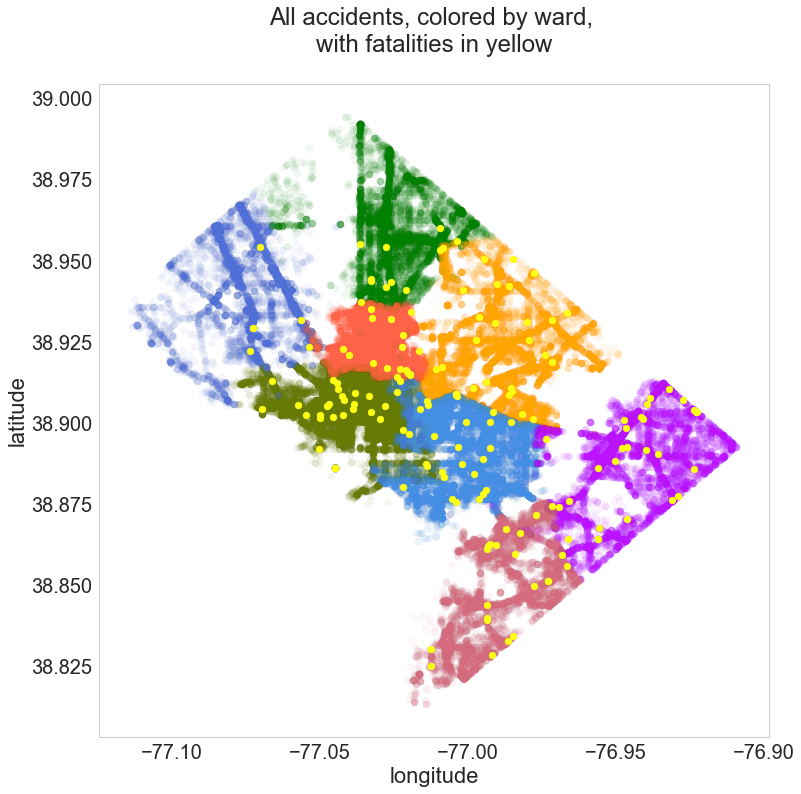

(12312, 40)


2.0    30788
6.0    20245
5.0    19497
7.0    15385
1.0    12814
8.0    12606
4.0    12222
3.0     9262
Name: ward_number, dtype: int64

In [295]:
ward1 = df.loc[df.ward_number == 1]
ward2 = df.loc[df.ward_number == 2]
ward3 = df.loc[df.ward_number == 3]
ward4 = df.loc[df.ward_number == 4]
ward5 = df.loc[df.ward_number == 5]
ward6 = df.loc[df.ward_number == 6]
ward7 = df.loc[df.ward_number == 7]
ward8 = df.loc[df.ward_number == 8]
ward9 = df.loc[df.ward_number == 9]

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
font = {'size'   : 18}
plt.rc('font', **font)

plt.scatter(ward1.x, ward1.y, c='tomato', alpha=.05)
plt.scatter(ward2.x, ward2.y, c='#677a04', alpha=.05)  # olive green
plt.scatter(ward3.x, ward3.y, c='#5170d7', alpha=.05)  # cornflower blue
plt.scatter(ward4.x, ward4.y, c='green', alpha=.05)
plt.scatter(ward5.x, ward5.y, c='orange', alpha=.05)
plt.scatter(ward6.x, ward6.y, c='#448ee4', alpha=.05) # lt purple
plt.scatter(ward7.x, ward7.y, c='#bc13fe', alpha=.05)
plt.scatter(ward8.x, ward8.y, c='#d46a7e', alpha=.05)
plt.scatter(ward1.x, ward1.y, c='tomato', alpha=.05)

plt.scatter(fatals.x, fatals.y, marker='o', c='#ffff14')

plt.title('All accidents, colored by ward, \nwith fatalities in yellow\n')
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.rcParams["axes.labelsize"] = 18


plt.savefig('All_accidents_colored_by_ward_with_fatals_in_yellow_white_bg.png')
plt.show();

print(majors.shape)
df.ward_number.value_counts()

(12312, 40)


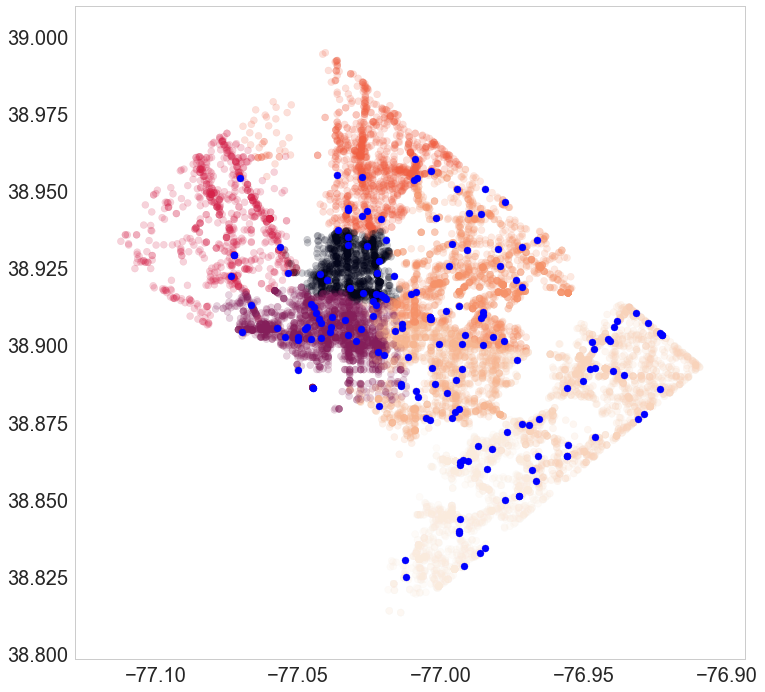

In [239]:
#import matplotlib.pyplot as plt # unsetting sns
sns.set_style("whitegrid", {'axes.grid' : False})
#plt.scatter(majors.x, majors.y, marker='o', c='#b04e0f', alpha=0.2)
plt.scatter(majors.x, majors.y, marker='o', c=np.log(majors.ward_number), alpha=0.2)
plt.scatter(fatals.x, fatals.y, marker='o', c='blue')

print(majors.shape)
plt.show();


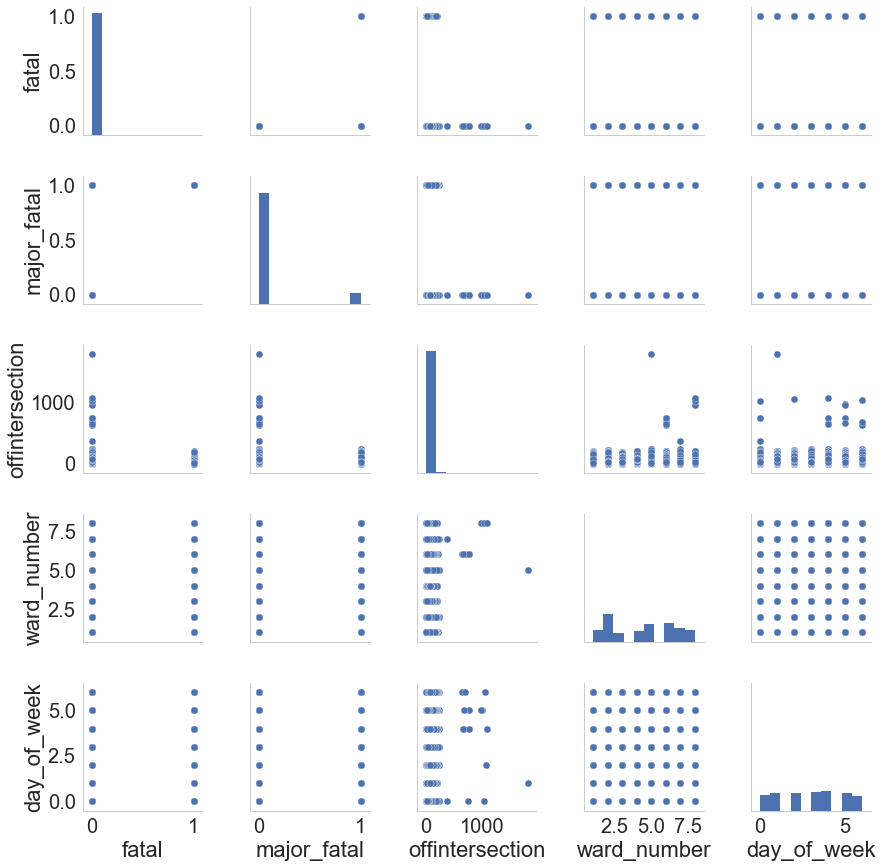

In [260]:
foo = df[['major_fatal','offintersection','ward_number','day_of_week','fatal_bicyclist',
         'fatal_driver','fatal_pedestrian']].copy(deep=True)
foo['fatal'] = 0
foo['fatal'] = np.where(((foo.fatal_bicyclist > 0) | 
                        (foo.fatal_driver > 0) | 
                        (foo.fatal_pedestrian > 0)), 1, 0) #, df.fatal_driver > 0, 1, df.fatal_pedestrian > 0, 1)

sns.pairplot(foo[['fatal','major_fatal','offintersection','ward_number','day_of_week']])


In [255]:
foo.head()

,major_fatal,offintersection,ward_number,day_of_week,fatal_bicyclist,fatal_driver,fatal_pedestrian,fatal
0,1,0.076475,5.0,0,0.0,0.0,0.0,0
1,0,0.042201,2.0,0,0.0,0.0,0.0,0
2,0,2.911309,4.0,3,0.0,0.0,0.0,0
3,0,21.374920,4.0,1,0.0,0.0,0.0,0
4,0,0.086942,5.0,2,0.0,0.0,0.0,0


/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


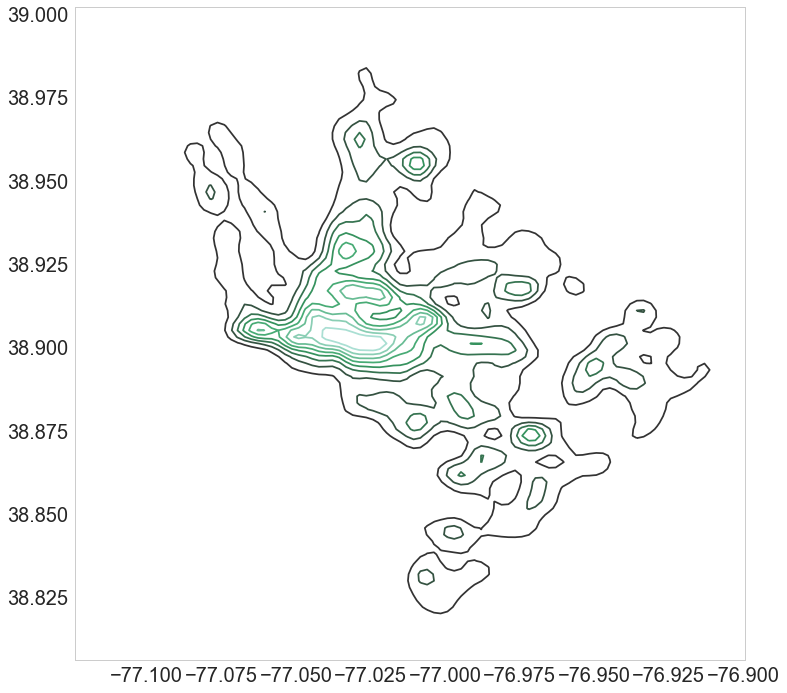

In [261]:
# Plot major injuries and fatalities as a heatmap
df_major = df.loc[df.major_fatal >= 0].copy(deep=True)
sns.kdeplot(df[['x','y']])

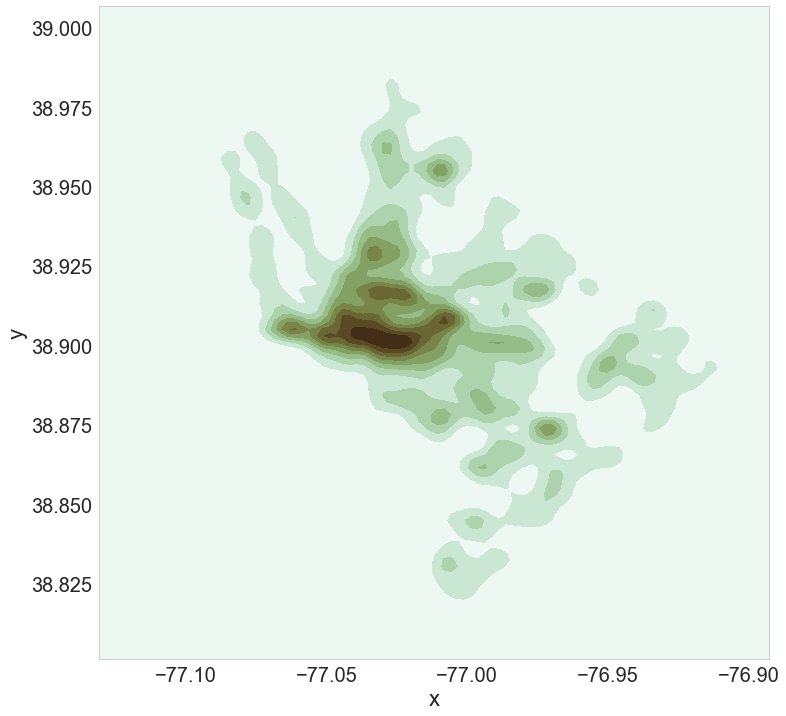

In [265]:
cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
sns.kdeplot(df_major.x, df_major.y, cmap=cmap, shade=True, cut=5)

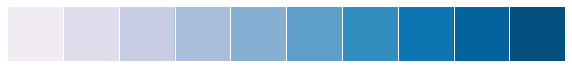

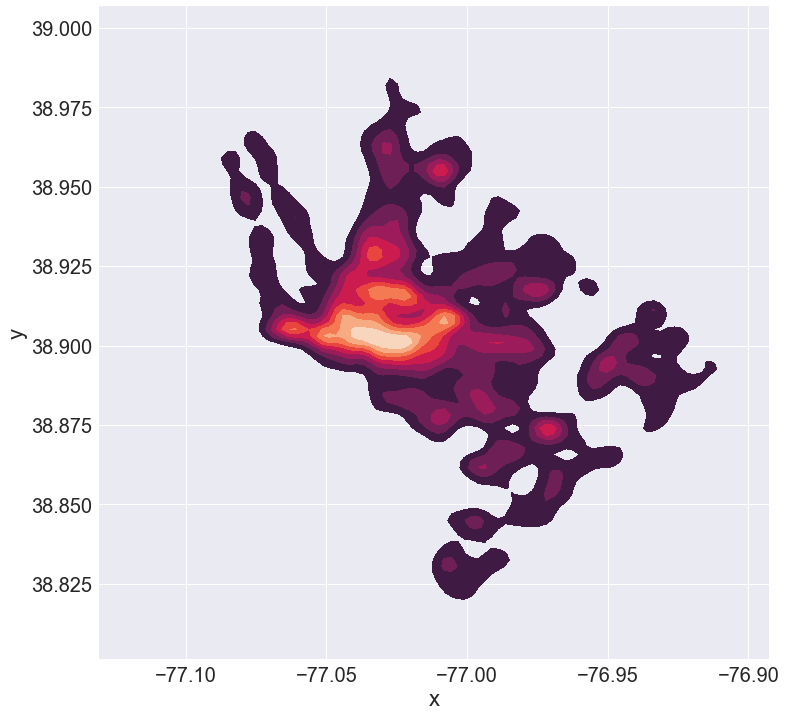

In [272]:
blues = sns.palplot(sns.color_palette("PuBu", 10))
sns.set_palette(blues)
plt.show()

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)

#sns.kdeplot(df_major.x, df_major.y, cmap=blues, shade=True, shade_lowest=False, cut=5)
# cmap="Purples_d"


In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)
font = {'size'   : 18}
plt.rc('font', **font)

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.kdeplot(df_major.x, df_major.y, cmap='Purples', shade=True, shade_lowest=False, cut=5)
plt.title('Major Injuries and Fatalities Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Majors_and_Fatalities_Heatmap.png')


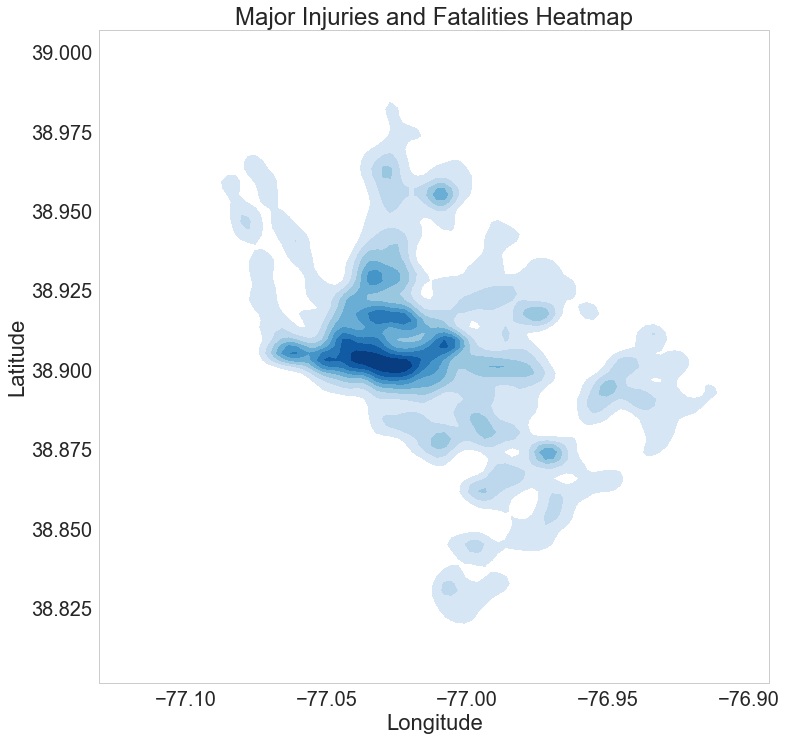

In [278]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)
font = {'size'   : 18}
plt.rc('font', **font)

sns.set_style("whitegrid", {'axes.grid' : False})
sns.kdeplot(df_major.x, df_major.y, cmap='Blues', shade=True, shade_lowest=False, cut=5)
plt.title('Major Injuries and Fatalities Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Majors_and_Fatalities_Heatmap.png')

TypeError: inner() got multiple values for argument 'ax'

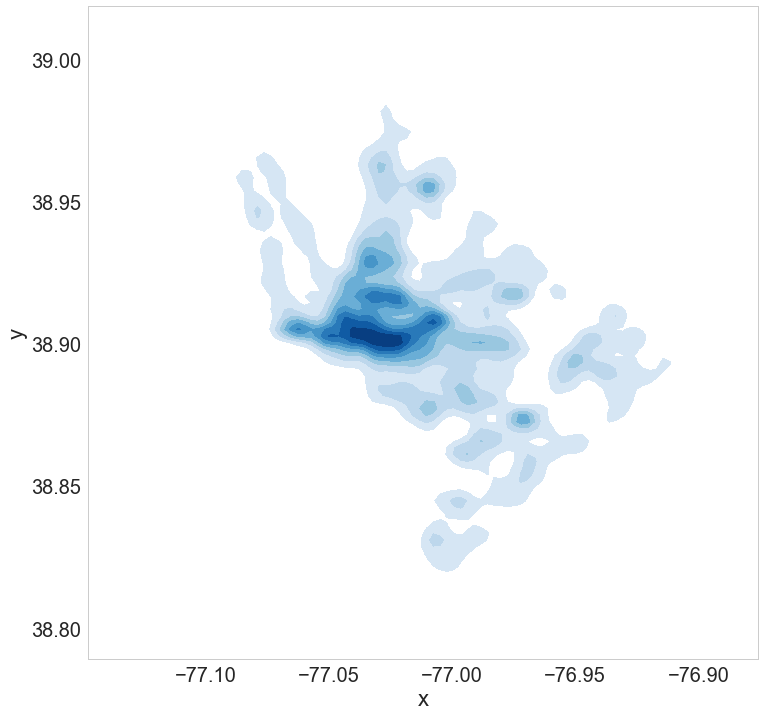

In [294]:
# Plot all accidents, and overplot the fatalities (pink) and major injuries (purple)
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)
font = {'size'   : 18}
plt.rc('font', **font)

sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()

sns.kdeplot(df.x, df.y, cmap='Blues', shade=True, shade_lowest=False, cut=10, ax=ax)
plt.scatter(fatals.x, fatals.y, color='yellow', ax=ax)
#sns.kdeplot(majors.x, majors.y, cmap='Purples', shade=True, shade_lowest=False, cut=5, ax=ax)
#sns.kdeplot(fatals.x, fatals.y, cmap=')
plt.title('All Crashes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('All_DC_Crashes.png')
plt.show()

In [290]:
#fatals.shape
#majors.fatal.sum()

df.shape

(132819, 42)

In [ ]:
df.columns

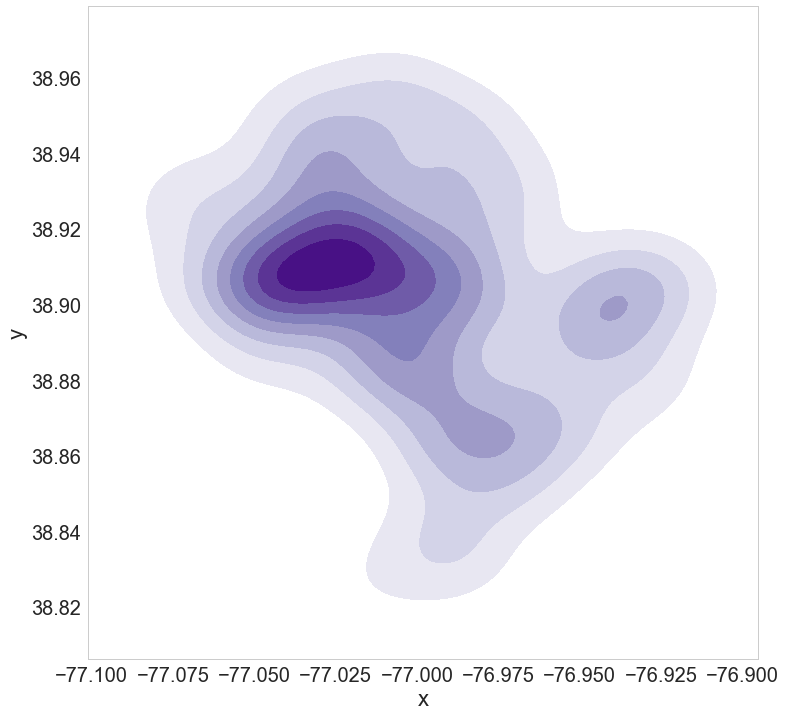

In [292]:
sns.kdeplot(fatals.x, fatals.y, cmap='Purples', shade=True, shade_lowest=False, cut=2)

In [296]:
# when the approach direction is on the diagonal, how many accidents are fatal or major?
# compare ratio to when approach direction is not on diagonal?
df.head()

,Unnamed: 0,x,y,majorinjuries_bicyclist,minorinjuries_bicyclist,fatal_bicyclist,majorinjuries_driver,minorinjuries_driver,fatal_driver,majorinjuries_pedestrian,...,Northeast,Northwest,South,Southeast,Southwest,West,cluster,major_fatal,year,month
0,570,-77.012158,38.915732,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1,0,0,0,0,0,2,1,2010,10
1,571,-77.012176,38.892094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2,0,2010,10
2,572,-77.011616,38.955593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,2,0,2017,5
3,573,-77.011616,38.956400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,2,0,2011,11
4,574,-77.012151,38.919183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2,0,2011,11
